# Model Building

In [1]:
import pandas as pd
import numpy as np

In [2]:
Data = pd.read_csv("Preprocessed_Data.csv")

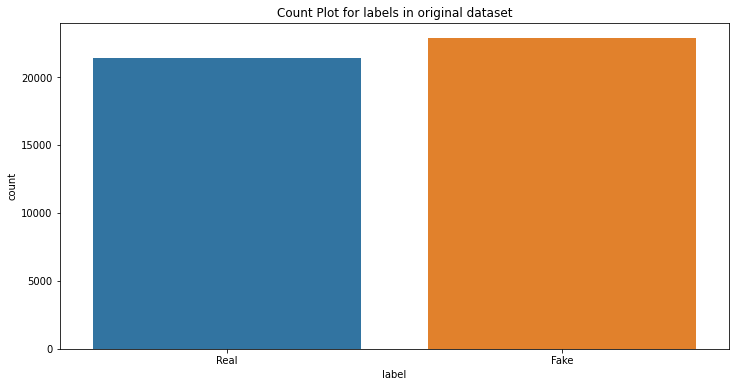

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
#sns.countplot(data= Train_Data, x="sentiment", hue="reviewerName")
sns.countplot(data= Data, x="label")
plt.title("Count Plot for labels in original dataset")
plt.show()

In [4]:
X = Data.drop(columns= ["title", "text", "subject", "date","label"], axis= 1)
y = Data["label"]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 5)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35416, 51), (8855, 51), (35416,), (8855,))

In [6]:
y_train.value_counts()

Fake    18322
Real    17094
Name: label, dtype: int64

In [7]:
y_test.value_counts()

Fake    4533
Real    4322
Name: label, dtype: int64

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# classification_report()

def Classification_Model_Adequacy(y_val, val_predictions):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_val, val_predictions)

    # Create a DataFrame from the confusion matrix
    cm_df = pd.DataFrame(cm, index=['True 1', 'True 0'], columns=['Predicted 1', 'Predicted 0'])

    # Extract the TP, FP, TN, and FN values from the confusion matrix
    TN, FP, FN, TP = cm.ravel()

    # Print the confusion matrix
    print("Confusion Matrix:")
    print(cm_df)

    print("_______________________________________________________________")

    # Calculate the overall accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    print(f"Accuracy: {accuracy}")

    # Calculate precision and recall (sensitivity or true positive rate)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")

    # Calculate specificity (true negative rate)
    specificity = TN / (TN + FP)
    print(f"Specificity: {specificity}")

    # Calculate F1 score (harmonic mean of precision and recall)
    f1_score = 2 * (precision * recall) / (precision + recall)
    print(f"F1 Score: {f1_score}")

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(true_labels, predicted_labels, labels=None):
    """
    Plot the confusion matrix as a heatmap.

    Parameters:
        true_labels (array-like): True labels of the data.
        predicted_labels (array-like): Predicted labels from the model.
        labels (list or array-like, optional): List of class labels to be used for plotting.

    Returns:
        None (displays the plot)
    """
    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Get the class labels
    if labels is None:
        labels = list(set(true_labels) | set(predicted_labels))

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Comparing Different models

Test Accuracy (logistic): 0.9245623941276115
______________________________________________________________


C:\Users\jaypr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


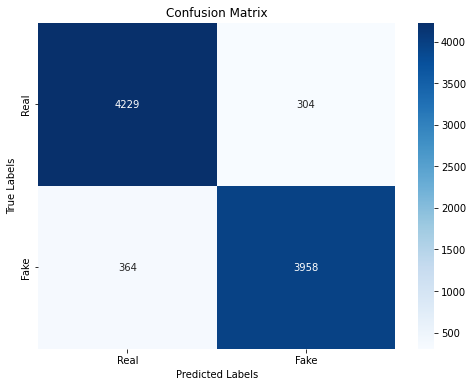

              precision    recall  f1-score   support

        Fake       0.92      0.93      0.93      4533
        Real       0.93      0.92      0.92      4322

    accuracy                           0.92      8855
   macro avg       0.92      0.92      0.92      8855
weighted avg       0.92      0.92      0.92      8855

______________________________________________________________
CPU times: total: 1.45 s
Wall time: 862 ms


In [10]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train a logistic regression model
# logreg_classifier = LogisticRegression(penalty = 'l2', solver = 'sag')
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)

# Make predictions on the test set
test_predictions_log = logreg_classifier.predict(X_test)

# Calculate accuracy
accuracy_log = accuracy_score(y_test, test_predictions_log)
print(f"Test Accuracy (logistic): {accuracy_log}")

print("______________________________________________________________")

# Print classification report for precision, recall, f1-score, support
# Classification_Model_Adequacy(y_val, val_predictions_log)
plot_confusion_matrix(y_test, test_predictions_log)
print(classification_report(y_test, test_predictions_log))

print("______________________________________________________________")

Test Accuracy (random forest): 0.9087521174477696
______________________________________________________________


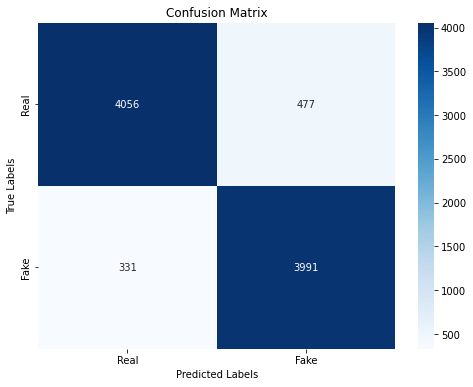

              precision    recall  f1-score   support

        Fake       0.92      0.89      0.91      4533
        Real       0.89      0.92      0.91      4322

    accuracy                           0.91      8855
   macro avg       0.91      0.91      0.91      8855
weighted avg       0.91      0.91      0.91      8855

______________________________________________________________
CPU times: total: 8.11 s
Wall time: 8.27 s


In [11]:
%%time

# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=5)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
test_predictions_rf = rf_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy_rf = accuracy_score(y_test, test_predictions_rf)
print(f"Test Accuracy (random forest): {accuracy_rf}")

print("______________________________________________________________")

# Print classification report for precision, recall, f1-score, support
# Classification_Model_Adequacy(y_test,test_predictions_rf)
plot_confusion_matrix(y_test, test_predictions_rf)
print(classification_report(y_test, test_predictions_rf))

print("______________________________________________________________")

Test Accuracy (perceptron): 0.9024280067758329
______________________________________________________________


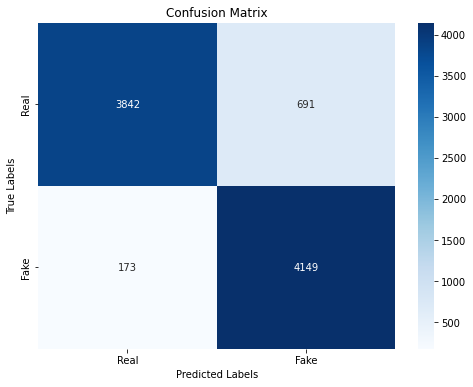

              precision    recall  f1-score   support

        Fake       0.96      0.85      0.90      4533
        Real       0.86      0.96      0.91      4322

    accuracy                           0.90      8855
   macro avg       0.91      0.90      0.90      8855
weighted avg       0.91      0.90      0.90      8855

______________________________________________________________
CPU times: total: 500 ms
Wall time: 508 ms


In [12]:
%%time

# Perceptron Algorithum

from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Create Perceptron classifier
perceptron = Perceptron()

# Train the model
perceptron.fit(X_train, y_train)

# Make predictions on the test set
test_predictions_perc = perceptron.predict(X_test)

# Calculate accuracy on the test set
accuracy_perc = accuracy_score(y_test, test_predictions_perc)
print(f"Test Accuracy (perceptron): {accuracy_perc}")

print("______________________________________________________________")

# Print classification report for precision, recall, f1-score, support
# Classification_Model_Adequacy(y_test, test_predictions_perc)
plot_confusion_matrix(y_test, test_predictions_perc)
print(classification_report(y_test, test_predictions_perc))

print("______________________________________________________________")

Test Accuracy (SVC): 0.8755505364201016
______________________________________________________________


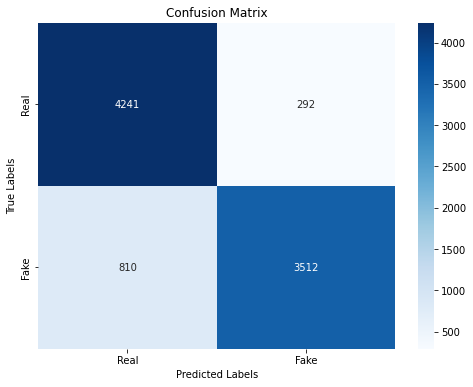

              precision    recall  f1-score   support

        Fake       0.84      0.94      0.89      4533
        Real       0.92      0.81      0.86      4322

    accuracy                           0.88      8855
   macro avg       0.88      0.87      0.87      8855
weighted avg       0.88      0.88      0.87      8855

______________________________________________________________
CPU times: total: 6min 39s
Wall time: 6min 39s


In [13]:
%%time

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create Linear Support Vector Classifier (LinearSVC)
svc_classifier = SVC(random_state=5)

# Train the model
svc_classifier.fit(X_train, y_train)

# Make predictions on the test set
test_predictions_svc = svc_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy_svc = accuracy_score(y_test, test_predictions_svc)
print(f"Test Accuracy (SVC): {accuracy_svc}")

print("______________________________________________________________")

# Print classification report for precision, recall, f1-score, support
# Classification_Model_Adequacy(y_test, test_predictions_log)
plot_confusion_matrix(y_test, test_predictions_svc)
print(classification_report(y_test, test_predictions_svc))

print("______________________________________________________________")

Test Accuracy (GaussianNB): 0.8641445511010728
______________________________________________________________


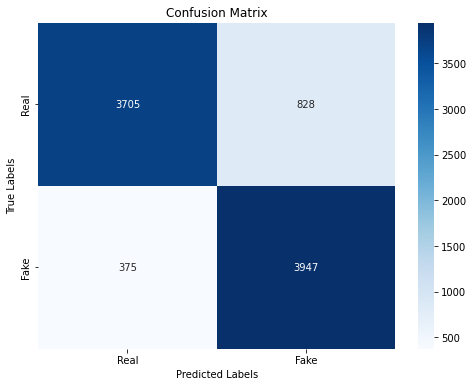

              precision    recall  f1-score   support

        Fake       0.91      0.82      0.86      4533
        Real       0.83      0.91      0.87      4322

    accuracy                           0.86      8855
   macro avg       0.87      0.87      0.86      8855
weighted avg       0.87      0.86      0.86      8855

______________________________________________________________
CPU times: total: 344 ms
Wall time: 335 ms


In [14]:
%%time

# Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions on the test set
test_predictions_gnb = gnb.predict(X_test)

# Calculate accuracy on the test set
accuracy_gnb = accuracy_score(y_test, test_predictions_gnb)
print(f"Test Accuracy (GaussianNB): {accuracy_gnb}")

print("______________________________________________________________")

# Print classification report for precision, recall, f1-score, support
# Classification_Model_Adequacy(y_test, test_predictions_gnb)
plot_confusion_matrix(y_test, test_predictions_gnb)
print(classification_report(y_test, test_predictions_gnb))

print("______________________________________________________________")

Test Accuracy (SVC): 0.8584980237154151
______________________________________________________________


C:\Users\jaypr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


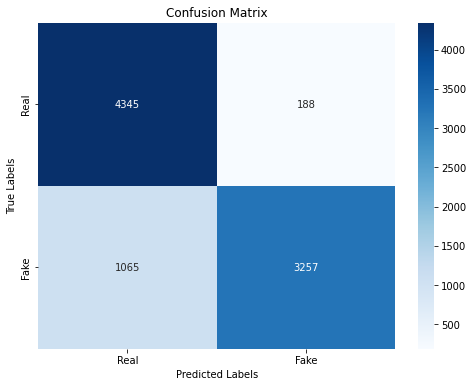

              precision    recall  f1-score   support

        Fake       0.80      0.96      0.87      4533
        Real       0.95      0.75      0.84      4322

    accuracy                           0.86      8855
   macro avg       0.87      0.86      0.86      8855
weighted avg       0.87      0.86      0.86      8855

______________________________________________________________
CPU times: total: 8.27 s
Wall time: 8.27 s


In [15]:
%%time

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Create Linear Support Vector Classifier (LinearSVC)
linear_svc_classifier = LinearSVC(random_state=5)

# Train the model
linear_svc_classifier.fit(X_train, y_train)

# Make predictions on the test set
test_predictions_linear_svc = linear_svc_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy_linear_svc = accuracy_score(y_test, test_predictions_linear_svc)
print(f"Test Accuracy (SVC): {accuracy_linear_svc}")

print("______________________________________________________________")

# Print classification report for precision, recall, f1-score, support
# Classification_Model_Adequacy(y_test, test_predictions_log)
plot_confusion_matrix(y_test, test_predictions_linear_svc)
print(classification_report(y_test, test_predictions_linear_svc))

print("______________________________________________________________")

Test Accuracy (SGD): 0.8254093732354602
______________________________________________________________


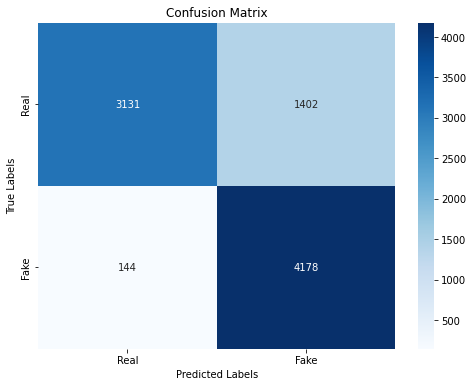

              precision    recall  f1-score   support

        Fake       0.96      0.69      0.80      4533
        Real       0.75      0.97      0.84      4322

    accuracy                           0.83      8855
   macro avg       0.85      0.83      0.82      8855
weighted avg       0.85      0.83      0.82      8855

______________________________________________________________
CPU times: total: 1.27 s
Wall time: 1.27 s


In [16]:
%%time

# SGD Classifier

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# We can try different loss function modified_huber, hinge, log, squared_hinge, perceptron

# Create SGD Classifier classifier
sgd_classifier = SGDClassifier(loss='hinge', max_iter=750, random_state=5)

# Train the model
sgd_classifier.fit(X_train, y_train)

# Make predictions on the test set
test_predictions_sgd = sgd_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy_sgd = accuracy_score(y_test, test_predictions_sgd)
print(f"Test Accuracy (SGD): {accuracy_sgd}")

print("______________________________________________________________")

# Print classification report for precision, recall, f1-score, support
# Classification_Model_Adequacy(y_test, test_predictions_sgd)
plot_confusion_matrix(y_test, test_predictions_sgd)
print(classification_report(y_test, test_predictions_sgd))

print("______________________________________________________________")

Test Accuracy (GaussianNB): 0.6058723884810842
______________________________________________________________


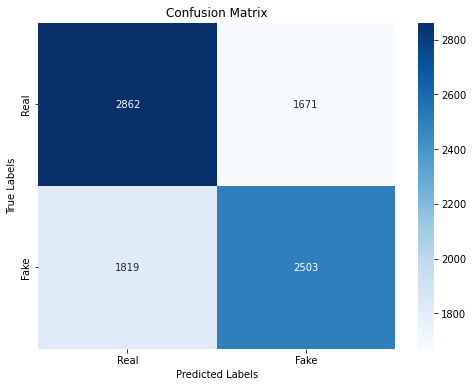

              precision    recall  f1-score   support

        Fake       0.61      0.63      0.62      4533
        Real       0.60      0.58      0.59      4322

    accuracy                           0.61      8855
   macro avg       0.61      0.61      0.61      8855
weighted avg       0.61      0.61      0.61      8855

______________________________________________________________


In [17]:
# %%time

# Gaussian Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Create Gaussian Naive Bayes classifier
mnb = MultinomialNB()

# Train the model
mnb.fit(X_train.abs(), y_train)

# Make predictions on the test set
test_predictions_mnb = mnb.predict(X_test.abs())

# Calculate accuracy on the test set
accuracy_mnb = accuracy_score(y_test, test_predictions_mnb)
print(f"Test Accuracy (GaussianNB): {accuracy_mnb}")

print("______________________________________________________________")

# Print classification report for precision, recall, f1-score, support
# Classification_Model_Adequacy(y_test, test_predictions_mnb)
plot_confusion_matrix(y_test, test_predictions_mnb)
print(classification_report(y_test, test_predictions_mnb))

print("______________________________________________________________")

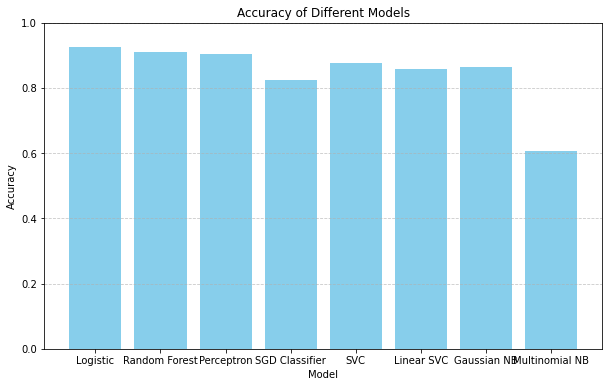

In [18]:
import matplotlib.pyplot as plt

# List of model names
model_names = ['Logistic', "Random Forest", 'Perceptron', 'SGD Classifier', "SVC", 'Linear SVC', 'Gaussian NB', "Multinomial NB"]

# List of accuracy values corresponding to each model
accuracy_values = [accuracy_log, accuracy_rf, accuracy_perc, accuracy_sgd, accuracy_svc, accuracy_linear_svc, accuracy_gnb, accuracy_mnb]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve_for_model(best_model, X_test, y_test):
    # Get confidence scores using decision_function
    conf_scores = best_model.decision_function(X_test)

    # Convert confidence scores to probabilities using the sigmoid function
    probs_positive_class = 1 / (1 + np.exp(-conf_scores))

    # Convert string labels to numeric values (0 for 'Real' and 1 for 'Fake')
    y_test_numeric = y_test.replace({'Fake': 0, 'Real': 1})

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_numeric, probs_positive_class)

    # Compute the area under the ROC curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

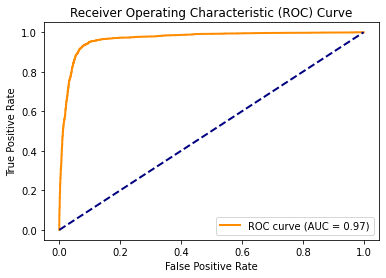

In [20]:
plot_roc_curve_for_model(logreg_classifier, X_test, y_test)

C:\Users\jaypr\AppData\Local\Temp\ipykernel_18236\2867953497.py:10: RuntimeWarning: overflow encountered in exp
  probs_positive_class = 1 / (1 + np.exp(-conf_scores))


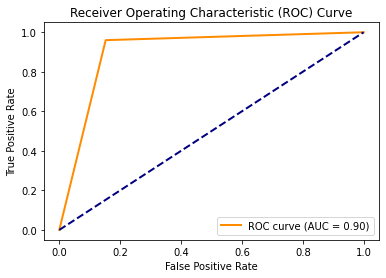

In [21]:
plot_roc_curve_for_model(perceptron, X_test, y_test)

# Hyperparameter Tunning

In [22]:
%%time

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid_log = [
    {'C': [0.01, 1.0, 10.0],  # Regularization strength values to try
    'penalty': ['l1', 'l2'],      # Types of regularization penalties to try
    'max_iter': [300],   # Maximum number of iterations to try
    'solver': ['liblinear',  'saga'],   # Solvers to try
#     'class_weight': ['balanced']
    },
    
    {'C': [0.01, 1.0, 10.0],
     'solver': ['lbfgs', 'sag', 'newton-cg'],
     'penalty': ['l2'],
     'max_iter': [300],
#      'class_weight': ['balanced']
    }
]
    
# Create Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state= 5)

# Create GridSearchCV with 5-fold cross-validation
grid_search_log = GridSearchCV(logreg_classifier, param_grid_log, cv=5, scoring='accuracy')

# Perform the grid search to find the best hyperparameters
grid_search_log.fit(X_train, y_train)

# Get the best hyperparameters
best_params_log = grid_search_log.best_params_
print("Best Hyperparameters:", best_params_log)

# Use the best model found by GridSearchCV for predictions on the test set
best_model_log = grid_search_log.best_estimator_
test_predictions_logreg = best_model_log.predict(X_test)

# Calculate accuracy on the test set
accuracy_log_hyp = accuracy_score(y_test, test_predictions_logreg)
print(f"Accuracy (Logistic Regression): {accuracy_log_hyp}")

print("______________________________________________________________")

# Print classification report for precision, recall, f1-score, support
print(classification_report(y_test, test_predictions_logreg))

print("______________________________________________________________")

C:\Users\jaypr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jaypr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jaypr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jaypr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jaypr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\jaypr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jaypr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jaypr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jaypr\AppData\Local\Programs\Py

C:\Users\jaypr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jaypr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jaypr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\jaypr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Hyperparameters: {'C': 0.01, 'max_iter': 300, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy (Logistic Regression): 0.9300959909655562
______________________________________________________________
              precision    recall  f1-score   support

        Fake       0.93      0.93      0.93      4533
        Real       0.93      0.93      0.93      4322

    accuracy                           0.93      8855
   macro avg       0.93      0.93      0.93      8855
weighted avg       0.93      0.93      0.93      8855

______________________________________________________________
CPU times: total: 24min 23s
Wall time: 21min 54s


In [23]:
grid_search_log.best_score_

0.9241586152033088

In [24]:
grid_search_log.best_params_

{'C': 0.01, 'max_iter': 300, 'penalty': 'l2', 'solver': 'liblinear'}

In [25]:
cvres = grid_search_log.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

-0.9232268265774701 {'C': 0.01, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
-0.9118760071055524 {'C': 0.01, 'max_iter': 300, 'penalty': 'l1', 'solver': 'saga'}
-0.9241586152033088 {'C': 0.01, 'max_iter': 300, 'penalty': 'l2', 'solver': 'liblinear'}
-0.9120454228569802 {'C': 0.01, 'max_iter': 300, 'penalty': 'l2', 'solver': 'saga'}
-0.9233962184130682 {'C': 1.0, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
-0.911988953597152 {'C': 1.0, 'max_iter': 300, 'penalty': 'l1', 'solver': 'saga'}
-0.9240456687117092 {'C': 1.0, 'max_iter': 300, 'penalty': 'l2', 'solver': 'liblinear'}
-0.9120454268429519 {'C': 1.0, 'max_iter': 300, 'penalty': 'l2', 'solver': 'saga'}
-0.9235374015275678 {'C': 10.0, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
-0.9120454268429519 {'C': 10.0, 'max_iter': 300, 'penalty': 'l1', 'solver': 'saga'}
-0.9240174241168662 {'C': 10.0, 'max_iter': 300, 'penalty': 'l2', 'solver': 'liblinear'}
-0.9120454268429519 {'C': 10.0, 'max_iter': 300, 'p

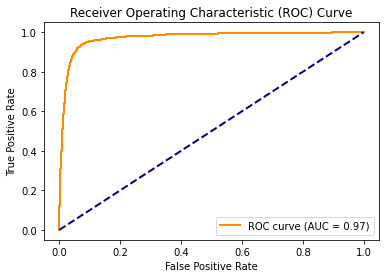

In [26]:
plot_roc_curve_for_model(best_model_log, X_test, y_test)

In [27]:
%%time

from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the hyperparameters to tune for perceptron
param_grid_per = {
    'penalty': ["l1", "l2"],
    'alpha': [0.001, 0.01, 0.1],
#     'max_iter': [250, 500],
    'max_iter': [120, 60],
    'fit_intercept': [True]
}

# Create the perceptron classifier
per_classifier = Perceptron(random_state= 5)

# Perform hyperparameter tuning for perceptron
grid_search_per = GridSearchCV(per_classifier, param_grid=param_grid_per, cv=5, scoring='accuracy')

# Perform the grid search to find the best hyperparameters
grid_search_per.fit(X_train, y_train)

# Get the best hyperparameters for perceptron
best_params_per = grid_search_per.best_params_
print("Best Hyperparameters for Perceptron:", best_params_per)

# Use the best model found by GridSearchCV for predictions on the test set
best_model_per = grid_search_per.best_estimator_
test_predictions_per = best_model_per.predict(X_test)

# Calculate accuracy on the test set
accuracy_per_hyp = accuracy_score(y_test, test_predictions_per)
print(f"Accuracy (Perceptron): {accuracy_per_hyp}")

print("______________________________________________________________")

# Print classification report for precision, recall, f1-score, support
print(classification_report(y_test, test_predictions_per))

print("______________________________________________________________")

Best Hyperparameters for Perceptron: {'alpha': 0.001, 'fit_intercept': True, 'max_iter': 250, 'penalty': 'l1'}
Accuracy (Perceptron): 0.9086391869000565
______________________________________________________________
              precision    recall  f1-score   support

        Fake       0.95      0.87      0.91      4533
        Real       0.88      0.95      0.91      4322

    accuracy                           0.91      8855
   macro avg       0.91      0.91      0.91      8855
weighted avg       0.91      0.91      0.91      8855

______________________________________________________________
CPU times: total: 15.6 s
Wall time: 15.7 s


In [28]:
grid_search_per.best_score_

0.8856446547761945

In [29]:
grid_search_per.best_params_

{'alpha': 0.001, 'fit_intercept': True, 'max_iter': 250, 'penalty': 'l1'}

In [30]:
cvres = grid_search_per.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

-0.8856446547761945 {'alpha': 0.001, 'fit_intercept': True, 'max_iter': 250, 'penalty': 'l1'}
-0.4859386520703575 {'alpha': 0.001, 'fit_intercept': True, 'max_iter': 250, 'penalty': 'l2'}
-0.8856446547761945 {'alpha': 0.001, 'fit_intercept': True, 'max_iter': 500, 'penalty': 'l1'}
-0.4859386520703575 {'alpha': 0.001, 'fit_intercept': True, 'max_iter': 500, 'penalty': 'l2'}
-0.8053999870695081 {'alpha': 0.01, 'fit_intercept': True, 'max_iter': 250, 'penalty': 'l1'}
-0.515248266640455 {'alpha': 0.01, 'fit_intercept': True, 'max_iter': 250, 'penalty': 'l2'}
-0.8053999870695081 {'alpha': 0.01, 'fit_intercept': True, 'max_iter': 500, 'penalty': 'l1'}
-0.515248266640455 {'alpha': 0.01, 'fit_intercept': True, 'max_iter': 500, 'penalty': 'l2'}
-0.8480902612110833 {'alpha': 0.1, 'fit_intercept': True, 'max_iter': 250, 'penalty': 'l1'}
-0.48260673056816916 {'alpha': 0.1, 'fit_intercept': True, 'max_iter': 250, 'penalty': 'l2'}
-0.8480902612110833 {'alpha': 0.1, 'fit_intercept': True, 'max_iter':

C:\Users\jaypr\AppData\Local\Temp\ipykernel_18236\2867953497.py:10: RuntimeWarning: overflow encountered in exp
  probs_positive_class = 1 / (1 + np.exp(-conf_scores))


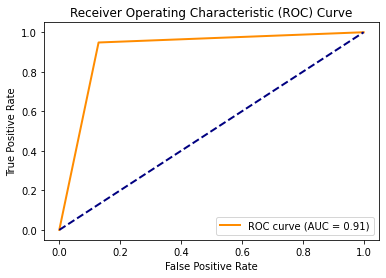

In [31]:
plot_roc_curve_for_model(best_model_per, X_test, y_test)

In [37]:
%%time

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the hyperparameters to tune for random forests
param_grid_rf = {
    'n_estimators': [100, 250],
    #'max_depth': [None, 10, 15],
    'max_depth': [None, 10],
    'min_samples_split': [10, 50],
    #'min_samples_leaf': [1, 5, 10],
    'min_samples_leaf': [5],
    #'max_feature': [25, 0.75, "None", "log2", "sqrt", "auto"],   # sqrt and auto are the same 
    'max_features': [0.5, "None", "sqrt"],
    'criterion': ["gini", "entropy"],
    'bootstrap': [True],
    'warm_start': [False]
}

# Create the random forests classifier
rf_classifier = RandomForestClassifier(random_state= 5)

# Perform hyperparameter tuning for random forests
grid_search_rf = GridSearchCV(rf_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy')

# Perform the grid search to find the best hyperparameters
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters for random forests
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forests:", best_params_rf)

# Use the best model found by GridSearchCV for predictions on the test set
best_model_rf = grid_search_rf.best_estimator_
test_predictions_rf = best_model_rf.predict(X_test)

# Calculate accuracy on the test set
accuracy_rf_hyp = accuracy_score(y_test, test_predictions_rf)
print(f"Accuracy (Random Forests): {accuracy_rf_hyp}")

print("______________________________________________________________")

# Print classification report for precision, recall, f1-score, support
print(classification_report(y_test, test_predictions_rf))

print("______________________________________________________________")

C:\Users\jaypr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jaypr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jaypr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\jaypr\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py

Best Hyperparameters for Random Forests: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100, 'warm_start': False}
Accuracy (Random Forests): 0.9534726143421796
______________________________________________________________
              precision    recall  f1-score   support

        Fake       0.96      0.95      0.95      4533
        Real       0.95      0.95      0.95      4322

    accuracy                           0.95      8855
   macro avg       0.95      0.95      0.95      8855
weighted avg       0.95      0.95      0.95      8855

______________________________________________________________


In [38]:
grid_search_rf.best_score_

0.9473119564081388

In [39]:
grid_search_rf.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 0.5,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100,
 'warm_start': False}

In [40]:
cvres = grid_search_rf.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

-0.9473119564081388 {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100, 'warm_start': False}
-0.9464931262318148 {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 250, 'warm_start': False}
-0.9384458561161505 {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 50, 'n_estimators': 100, 'warm_start': False}
-0.9387282343030645 {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 50, 'n_estimators': 250, 'warm_start': False}
nan {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'None', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100, 'warm_start': False}
nan {'bootstrap': True, 'criterion': 'gini', 'max_depth': 

In [ ]:
# -0.9496555761789727 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 250, 'warm_start': False}

In [41]:
best_model_rf.feature_importances_

array([0.08499118, 0.003083  , 0.00714244, 0.00262285, 0.00939824,
       0.00437524, 0.00828263, 0.00487121, 0.00345549, 0.00315604,
       0.02158933, 0.01237583, 0.0106069 , 0.00316058, 0.00285243,
       0.00300814, 0.00600067, 0.0035792 , 0.00345382, 0.0029605 ,
       0.00317469, 0.0044024 , 0.00282081, 0.0066969 , 0.01015023,
       0.01255961, 0.00706857, 0.1594646 , 0.00283171, 0.09632054,
       0.29580378, 0.00963573, 0.00308663, 0.00336923, 0.00552453,
       0.00246562, 0.01281477, 0.00307936, 0.00288283, 0.0032141 ,
       0.01724795, 0.00374526, 0.00419885, 0.00746742, 0.04359906,
       0.00377893, 0.00252537, 0.01316778, 0.02816758, 0.00567735,
       0.02209208])

In [42]:
best_model_rf.feature_names_in_

array(['Unnamed: 0', 'word2vec_1', 'word2vec_2', 'word2vec_3',
       'word2vec_4', 'word2vec_5', 'word2vec_6', 'word2vec_7',
       'word2vec_8', 'word2vec_9', 'word2vec_10', 'word2vec_11',
       'word2vec_12', 'word2vec_13', 'word2vec_14', 'word2vec_15',
       'word2vec_16', 'word2vec_17', 'word2vec_18', 'word2vec_19',
       'word2vec_20', 'word2vec_21', 'word2vec_22', 'word2vec_23',
       'word2vec_24', 'word2vec_25', 'word2vec_26', 'word2vec_27',
       'word2vec_28', 'word2vec_29', 'word2vec_30', 'word2vec_31',
       'word2vec_32', 'word2vec_33', 'word2vec_34', 'word2vec_35',
       'word2vec_36', 'word2vec_37', 'word2vec_38', 'word2vec_39',
       'word2vec_40', 'word2vec_41', 'word2vec_42', 'word2vec_43',
       'word2vec_44', 'word2vec_45', 'word2vec_46', 'word2vec_47',
       'word2vec_48', 'word2vec_49', 'word2vec_50'], dtype=object)